# Datasets y Dataloaders

## Datasets

Pytorch proporciona ``Datasets`` que són como bases de datos, en ellos se guardan los datos junto con sus etiquetas.

Hay dos maneras de crear ``Datasets``, descargarlos de los conjuntos de datos de entrenamiento de Pytorch, o crearlos desde cero

### Creación de un Dataset a partir de un conjunto de datos de Pytorch

PyTorch proporcionan una serie de conjuntos de datos precargados que implementan funciones específicas para los datos. Se pueden utilizar para crear prototipos y comparar su modelo. Puede encontrarlos aquí:
 * [Conjuntos de datos de imagen](https://pytorch.org/vision/stable/datasets.html)
 * [Conjuntos de datos de texto](https://pytorch.org/text/stable/datasets.html)
 * [Conjuntos de datos de audio](https://pytorch.org/audio/stable/datasets.html)

A continuación, se muestra un ejemplo de cómo cargar el conjunto de datos ``CIFAR-10`` de TorchVision. El conjunto de datos `CIFAR-10` consta de 60.000 imágenes en color de 32x32 píxeles,  en 10 clases, con 6.000 imágenes por clase. Hay 50.000 imágenes de entrenamiento y 10.000 imágenes de test.

Las 10 posibles clases son airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

A la hora de crear un ``Dataset`` a partir de un conjunto de datos precargado de Pytorch tenemos cuatro parámetros que podemos modificar y son:
 * ``root``: es la ruta donde se van a almacenan los datos de train y validación
 * ``train``: especifica si el conjunto de datos que se quiere descargar es el de entrenamiento o de validación
 * ``download``: Por defecto es ``True``, descarga los datos de Internet si no están disponibles en ``root``.
 * ``transform``: especifican las transformaciones de las características (en este caso de las imágenes). Las transformaciones se explicarán más adelante
 * ``target_transform``: especifican las transformaciones de las etiquetas. Las transformaciones se explicarán más adelante
 * ``transform`` y ``target_transform``: especifican las transformaciones de las características (en este caso de las imágenes) y etiquetas en conjunto. Las transformaciones se explicarán más adelante

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

validation_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


Como se puede ver se han creado dos ``Dataset``s, uno de entrenamiento y otro de test. Los dos tienen sus datos en la carpeta data, en el de entrenamiento el parametro ``train`` es igual a ``True``, lo que indica que se descarguen los datos de entrenamiento, y en el de test el parámetro ``train`` es igual a ``False``, lo que indica que se descarguen los datos de validación. Por último, en ambos dataset se ha indicado que se transformen las imágenes a tipo tensor.

Habíamos dicho que el conjunto de datos ``CIFAR-10`` constaba de 50.000 imágenes de entrenamiento y 10.000 imágenes de test, comprobemos si en nuestros ``Dataset``s se mantiene esto

In [4]:
len(training_data), len(validation_data)

(50000, 10000)

Veamos una muestra

In [5]:
sample_training_data = training_data[0]
len(sample_training_data)

2

Vemos que la muestra tiene 2 items, esto es porque contiene la imágen y la etiqueta. Así que procedamos a separarlos para analizarlos

In [6]:
image_sample_training_data = sample_training_data[0]
image_sample_training_label = sample_training_data[1]
image_sample_training_data.shape, image_sample_training_label

(torch.Size([3, 32, 32]), 6)

Vemos que la imagen de la muestra tiene un tamaño de 3x32x232 píxeles, es decir, una imagen a color, de 3 canales (RGB) de 32x32 píxeles. Esta imagen corresponde a la clase cuya etiqueta vale 6

Representemos varias muestras

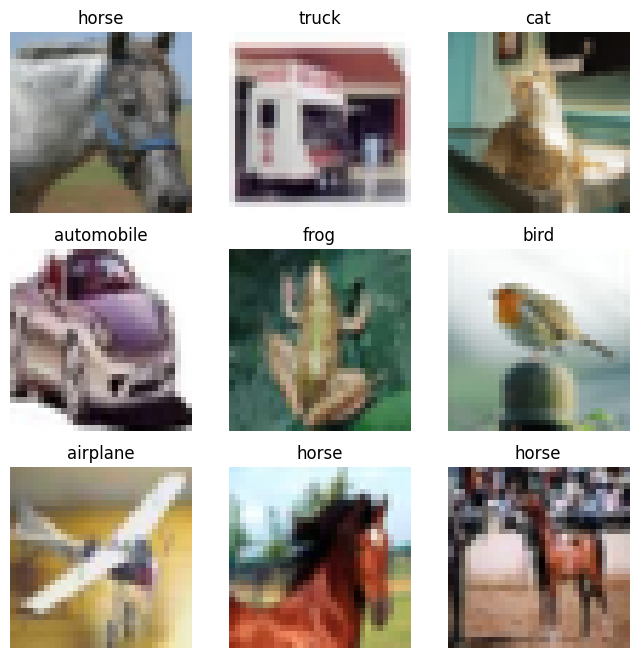

In [7]:
import matplotlib.pyplot as plt
from random import randint

labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = randint(0, len(training_data)-1)
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1,2,0).squeeze())  
    # permute cambia el orden de las dimensiones, ya que las
    # imágenes tienen tamaño 3x32x32, pero necesitamos que
    # las dimensiones sean 32x32x3 para que matplotlib las pinte
    # así que se permutan poniendo primero las dos de 32 y 
    # la última la de 3
    
    # squeeze elimina todas las dimensiones 1 de un tensor, 
    # si se le mete un tensor de dimensiones (Ax1xBxCx1xD) 
    # devuelve un tensor de dimensiones (AxBxCxD)

plt.show()

### Creación de un Dataset personalizado

Ahora vamos a descargar otra vez el conjunto de datos ``CIFAR-10`` pero ahora no como un dataset, sino como imágenes en crudo y vamos a crear el dataset.

Si se descargan de su [fuente original](https://www.cs.toronto.edu/~kriz/cifar.html) se obtendrán una serie de listas de python con los valores de cada pixel de cada imagen. Así que lo que vamos a hacer es descargar el conjunto de este repositorio de [github](https://github.com/YoongiKim/CIFAR-10-images) en el que han convertido esas listas a imágenes en formato JPG

In [8]:
import git
import os

url = "https://github.com/YoongiKim/CIFAR-10-images"
to_path = "data/CIFAR_10_JPG"

# Se comprueba si el directorio existe
if os.path.isdir(to_path):

    # Si existe, se comprueba si está vacío
    if not os.listdir(to_path):

        # Si está vacío se clona el repositorio
        git.repo.base.Repo.clone_from(url=url, to_path=to_path)

else:

    # Si no extiste se crea y se clona el repositorio
    os.mkdir(to_path)
    git.repo.base.Repo.clone_from(url=url, to_path=to_path)

Al descargarlo vemos que tenemos una carpeta de entrenamiento y otra de test. Ya sé que hemos dicho que normalmente se divide el dataset en entrenamiento validación y test. Con el dataset de entrenamiento entrenamos, con el de validación vemos la evolución de la métrica que estemos usando para asegurarnos de que el modelo aprende y no se sobreentrena, y después de probar muchos tipos de modelos distintos, con distintos hiperparámetros, probamos cúal es el mejor con el dataset de test

Bueno, pues muchas veces nos encontraremos en internet que solo hay dataset de entrenamiento y de test, por lo que tenemos dos opciones, el de entrenamiento, dividirlo en entrenamiento y validación, o con el de test hacer las comprobaciones que se hace con el de validación y quedarnos sin dataset de test

Como ahora no vamos a entrenar un modelo, sino que vamos a aprender a crear `Dataset`s de Pytorch personalizados, utilizamos el de test como validación

In [9]:
os.listdir(to_path)

['train', 'README.md', 'test', '.git']

Dentro de cada una tenemos una carpeta de cada clase

In [10]:
path_train = to_path + "/train"
os.listdir(path_train)

['cat',
 'frog',
 'bird',
 'ship',
 'automobile',
 'airplane',
 'dog',
 'horse',
 'deer',
 'truck']

Vamos a crear un DataFrame de Pandas con todas las imágenes y sus etiquetas

In [11]:
import pandas as pd

labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

def createDataFrame(parent_dir):
    # Numero de labels
    N = 10

    # Se crea un diccionario con datos aleatorios para hacer un dataframe vacío
    diccionario = {
        "images names": pd.Series([""]),
        "path": pd.Series([""]),
        "label": pd.Series([0])
        }

    # Se crea un dataframe a partir del diccionario
    dataframe = pd.DataFrame(diccionario)

    # Se elimina la primera fila, así se tiene un datframe vacío
    dataframe.drop(dataframe.index[0], axis=0, inplace=True)

    # Se completa el dataframe
    for i in range (N):
        label = i
        images_dir = parent_dir + labels_map[label] + "/"

        # Se crea una lista con las imágenes
        images_list = os.listdir(images_dir)

        # Se crea una serie a partir de la lista
        serie = pd.Series(images_list)

        # Se crea un sub dataframe a partir de la serie
        subdataframe = pd.DataFrame(serie, columns=["images names"])

        # Se añade una columna con el path de la imagen
        subdataframe["path"] = images_dir + subdataframe["images names"]

        # Se añade una columna con la etiqueta
        subdataframe["label"] = label

        # Se concatena el dataframe con el sub dataframe
        dataframe = pd.concat([dataframe, subdataframe], ignore_index=True)

    return dataframe

In [12]:
parent_dir = to_path + '/' + "train/"
train_dataframe = createDataFrame(parent_dir)
print(len(train_dataframe))
train_dataframe.head()

50000


,images names,path,label
0,1140.jpg,data/CIFAR_10_JPG/train/airplane/1140.jpg,0
1,1461.jpg,data/CIFAR_10_JPG/train/airplane/1461.jpg,0
2,2941.jpg,data/CIFAR_10_JPG/train/airplane/2941.jpg,0
3,3725.jpg,data/CIFAR_10_JPG/train/airplane/3725.jpg,0
4,4904.jpg,data/CIFAR_10_JPG/train/airplane/4904.jpg,0


In [13]:
parent_dir = to_path + '/' + "test/"
test_dataframe = createDataFrame(parent_dir)
print(len(test_dataframe))
test_dataframe.head()

10000


,images names,path,label
0,0305.jpg,data/CIFAR_10_JPG/test/airplane/0305.jpg,0
1,0457.jpg,data/CIFAR_10_JPG/test/airplane/0457.jpg,0
2,0891.jpg,data/CIFAR_10_JPG/test/airplane/0891.jpg,0
3,0959.jpg,data/CIFAR_10_JPG/test/airplane/0959.jpg,0
4,0164.jpg,data/CIFAR_10_JPG/test/airplane/0164.jpg,0


Ya podemos crear el ``Dataset`` personalizazo. Para crear un ``Dataset`` personalizado Pytorch nos pide que hagamos una clase con los 3 siguientes métodos: ``__init__``, `__len__` y `__getitem__`. Como es un ``Dataset`` personalizado las opciones de cómo hacerlo son infinitas, por lo explicaremos para este conjunto de datos para que se entienda la idea.

In [14]:
from skimage import io
import torch
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, images_dir, labels=None, train=True):
        self.images_dir = images_dir
        self.labels = labels
        self.train = train

    def __len__(self):
        return len(self.images_dir)

    def __getitem__(self, idx):
        img = io.imread(self.images_dir[idx])
        img = torch.from_numpy(img)

        # imread devuelve las imágenes con los canales al final, pero para
        # que sea similar al dataset creado antes ponemos los canales al
        # principio
        H, W, C = img.shape
        img = img.view(C, H, W)

        if self.train:
            label = torch.tensor([self.labels[idx]]).item()
            return img, label
        else:
            return img

In [15]:
training_data = CustomImageDataset(images_dir=train_dataframe["path"], labels=train_dataframe["label"])
test_data = CustomImageDataset(images_dir=test_dataframe["path"], labels=test_dataframe["label"])

Vemos el número de muestras de entrenamiento y test

In [16]:
len(training_data), len(test_data)

(50000, 10000)

Veamos una muestra

In [17]:
sample_training_data = training_data[0]
len(sample_training_data)

2

Se puede ver que la dimensión de la muestra es 2, esto es porque la muestra contiene la imagen y la etiqueta, así que obtenemos solo la imagen

In [18]:
image_sample_training_data = sample_training_data[0]
image_sample_training_label = sample_training_data[1]
image_sample_training_data.shape, image_sample_training_label

(torch.Size([3, 32, 32]), 0)

Vemos que la imágen de la muestra tiene un tamaño de 3x32x32 píxeles, es decir, una imágen a color de 32x32. Esta imágen corresponde a la etiqueta de valor 0

Representemos varias muestras

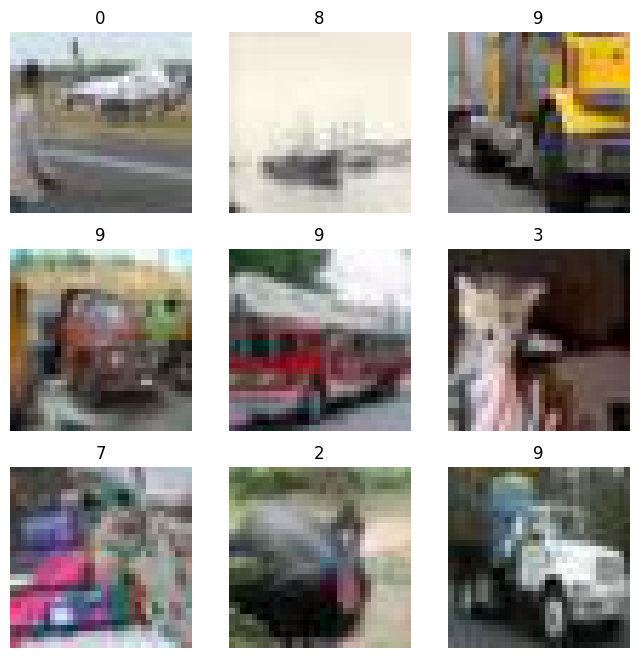

In [19]:
import matplotlib.pyplot as plt
from random import randint

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = randint(0, len(training_data)-1)
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(str(label))
    plt.axis("off")

    # Ponemos la dimensión del caal al final para poder 
    # representar las imágenes
    C, H, W = img.shape
    img = img.view(H, W, C)
    
    plt.imshow(img.squeeze())  
    # permute cambia el orden de las dimensiones, ya que las
    # imágenes tienen tamaño 3x32x32, pero necesitamos que
    # las dimensiones sean 32x32x3 para que matplotlib las pinte
    # así que se permutan poniendo primero las dos de 32 y 
    # la última la de 3
    
    # squeeze elimina todas las dimensiones 1 de un tensor, 
    # si se le mete un tensor de dimensiones (Ax1xBxCx1xD) 
    # devuelve un tensor de dimensiones (AxBxCxD)

plt.show()

## Dataloaders

El dataset que nos acabamos de crear tiene 50.000 imágenes de entrenamiento, como veremos más en detalle en el próximo capítulo, no se puede entrenar a la red con todas esas imágenes a la vez porque no entran en la memoria de la GPU, por lo que se suele dividir el conjunto de imágenes de entrenamiento en *batches*, de una tamaño que entre en la memoria de la GPU.

De esta manera se mete una *batch* en la GPU, se procesa, se hacen las correcciones que sean necesarias en la red neuronal (entrenamiento), se mete otro *batch*, etc. y así hasta que se muestra a la red neuronal todas las imágenes.

Al tamaño de estos *batches* se le llama `batch size`

Pero como hemos dicho, lo veremos mejor en el siguiente capítulo

Una vez tenemos el ``Dataset`` creado podemos crear *batches* muy facilmente mediante los ``Dataloader``s. El ``Dataloader`` iterará a través del ``Dataset``, cogiendo el número de muestras (*batch size*) que queramos. Además si queremos puede barajar los datos, es decir, los cogerá aleatoriamente, en vez de en el orden en el que está en el ``Dataset``, una vez ha pasado por todos los datos del ``Dataset``, si queremos volver a pasar el `Dataset` por la red neuronal, el orden será completamente distinto a la anterior vez.

In [20]:
from torch.utils.data import DataLoader

BS = 64

train_dataloader = DataLoader(training_data, batch_size=BS, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BS, shuffle=True)

### Iterar a través de un Dataloader

Podemos iterar a traves del ``Dataloader`` para obtener los *batches*

In [21]:
batch = next(iter(train_dataloader))
len(batch)

2

Como vemos el tamaño del minibatch es 2, tenemos por un lado las imágenes y por otro las etiquetas

In [22]:
train_features, train_labels = batch

train_features.shape, train_labels.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

Ahora si podemos comrpobar como tenemos por un lado un minibatch con 64 imágenes de 3x32x32 píxeles y por otro lado 64 etiquetas